In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [477]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize



In [478]:
train_df = pd.read_csv('C:/Users/Imp/KAGGLE/Ganalytics/data/train-flattened.csv')

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (2,49) have mixed types. Specify dtype option on import or set low_memory=False.



In [479]:
test_df = pd.read_csv('C:/Users/Imp/KAGGLE/Ganalytics/data/test-flattened.csv')

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [480]:
print(train_df.shape, test_df.shape)

(903653, 55) (804684, 53)


In [481]:
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


Firstly we have Visitor Id vs Total Revenue per Id

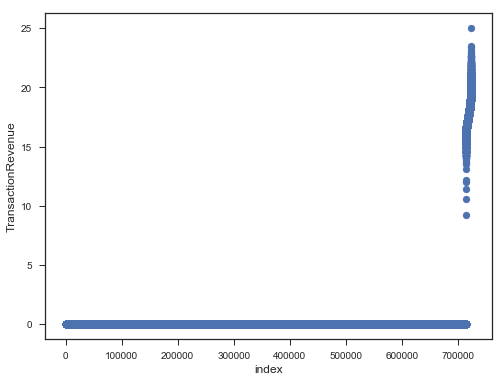

In [482]:
train_df["totals.transactionRevenue"] = train_df["totals.transactionRevenue"].astype('float')
Vis_rev = train_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(Vis_rev.shape[0]), np.sort(np.log1p(Vis_rev["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [483]:
Vis_rev.head(3)

,fullVisitorId,totals.transactionRevenue
0,4823595352351,0.0
1,5103959234087,0.0
2,10278554503158,0.0


In [484]:
import seaborn as sns

In [485]:
gdf = Vis_rev

In [486]:
nzi = pd.notnull(train_df["totals.transactionRevenue"]).sum()
nzr = (gdf["totals.transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", nzi, " and ratio is : ", nzi / train_df.shape[0])
print("Number of unique customers with non-zero revenue : ", nzr, "and the ratio is : ", nzr / gdf.shape[0])

Number of instances in train set with non-zero revenue :  11515  and ratio is :  0.0127427231470487
Number of unique customers with non-zero revenue :  10114 and the ratio is :  0.013973415418283704


In [487]:
print("Number of unique visitors in train set : ",train_df.fullVisitorId.nunique(), " out of rows : ",train_df.shape[0])
print("Number of unique visitors in test set : ",test_df.fullVisitorId.nunique(), " out of rows : ",test_df.shape[0])
print("Number of common visitors in train and test set : ",len(set(train_df.fullVisitorId.unique()).intersection(set(test_df.fullVisitorId.unique())) ))

Number of unique visitors in train set :  723803  out of rows :  903653
Number of unique visitors in test set :  650489  out of rows :  804684
Number of common visitors in train and test set :  6300


In [488]:
const_cols = [c for c in train_df.columns if train_df[c].nunique(dropna=False)==1 ]
const_cols

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [489]:
#remove constant columns

In [490]:
print("Variables not in test but in train : ", set(train_df.columns).difference(set(test_df.columns)))

Variables not in test but in train :  {'trafficSource.campaignCode', 'totals.transactionRevenue'}


In [491]:
cols_to_drop = const_cols + ['sessionId']

train_df = train_df.drop(cols_to_drop + ["trafficSource.campaignCode"], axis=1)
test_df = test_df.drop(cols_to_drop, axis=1)

In [492]:
# Impute 0 for missing target values
train_df["totals.transactionRevenue"].fillna(0, inplace=True)
train_y = train_df["totals.transactionRevenue"].values
train_id = train_df["fullVisitorId"].values
test_id = test_df["fullVisitorId"].values


# label encode the categorical variables and convert the numerical variables to float
cat_cols = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", "trafficSource.adContent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.gclId", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.referralPath", "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']

In [493]:
import sys
from sklearn import preprocessing

In [494]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 34 columns):
channelGrouping                                 903653 non-null object
date                                            903653 non-null int64
fullVisitorId                                   903653 non-null object
visitId                                         903653 non-null int64
visitNumber                                     903653 non-null int64
visitStartTime                                  903653 non-null int64
device.browser                                  903653 non-null object
device.deviceCategory                           903653 non-null object
device.isMobile                                 903653 non-null bool
device.operatingSystem                          903653 non-null object
geoNetwork.city                                 903653 non-null object
geoNetwork.continent                            903653 non-null object
geoNetwork.country                         

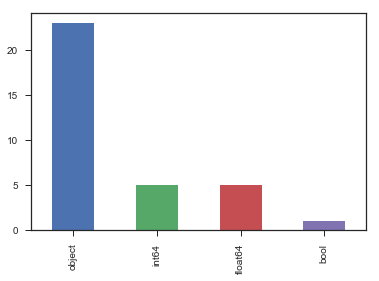

In [505]:
pd.value_counts(train_df.dtypes).plot(kind='bar')

In [506]:
def bar_plot(column,**args):
    pd.value_counts(train_df[column]).plot(kind="bar",**args)

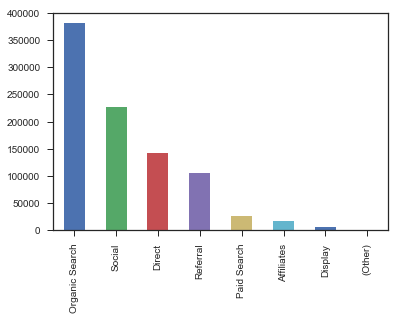

In [507]:
bar_plot("channelGrouping")

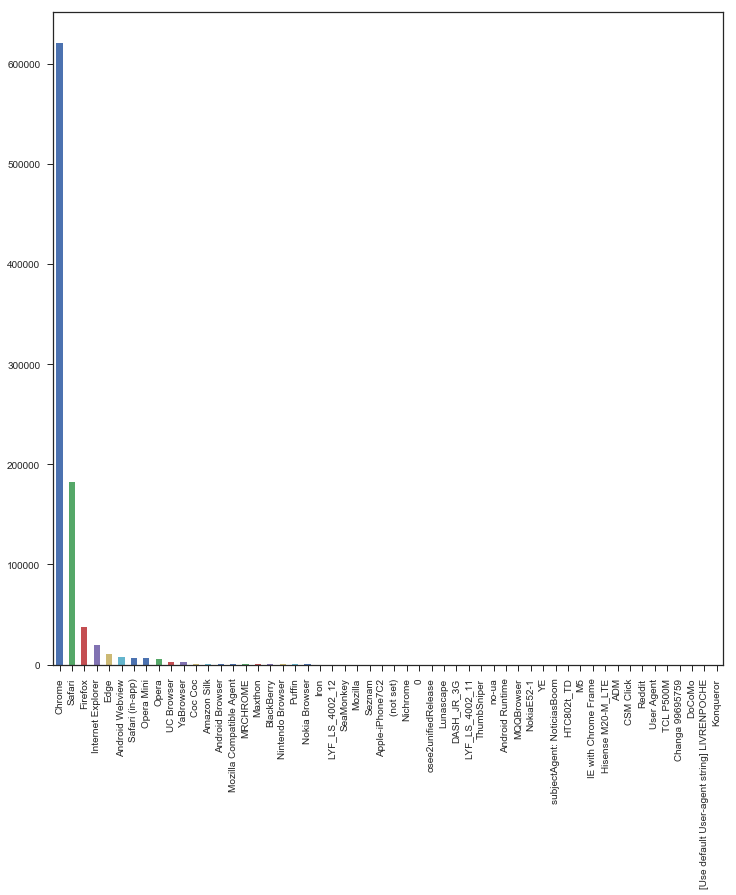

In [513]:
bar_plot('device.browser', figsize=(12,12))

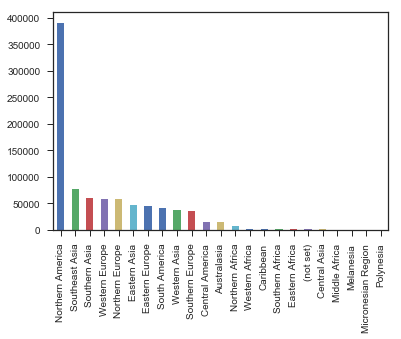

In [517]:
pd.value_counts(train_df['geoNetwork.subContinent']).plot(kind='bar')

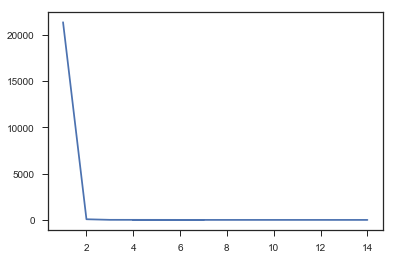

In [520]:
pd.value_counts(train_df['trafficSource.adwordsClickInfo.page']) .plot()

In [521]:
#Need to create new features

In [522]:
for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    train_df[col] = lbl.transform(list(train_df[col].values.astype('str')))
    test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))


channelGrouping
device.browser
device.deviceCategory
device.operatingSystem
geoNetwork.city
geoNetwork.continent
geoNetwork.country
geoNetwork.metro
geoNetwork.networkDomain
geoNetwork.region
geoNetwork.subContinent
trafficSource.adContent
trafficSource.adwordsClickInfo.adNetworkType
trafficSource.adwordsClickInfo.gclId
trafficSource.adwordsClickInfo.page
trafficSource.adwordsClickInfo.slot
trafficSource.campaign
trafficSource.keyword
trafficSource.medium
trafficSource.referralPath
trafficSource.source
trafficSource.adwordsClickInfo.isVideoAd
trafficSource.isTrueDirect


In [523]:
num_cols = ["totals.hits", "totals.pageviews", "visitNumber", "visitStartTime", 'totals.bounces',  'totals.newVisits']    
for col in num_cols:
    train_df[col] = train_df[col].astype(float)
    test_df[col] = test_df[col].astype(float)

In [528]:
#Time vs Totals or numerical columns

In [530]:
train_df[num_cols].head(2)

,totals.hits,totals.pageviews,visitNumber,visitStartTime,totals.bounces,totals.newVisits
0,1.0,1.0,1.0,1.472830e+09,1.0,1.0
1,1.0,1.0,1.0,1.472880e+09,1.0,1.0


In [533]:
import seaborn as sns

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



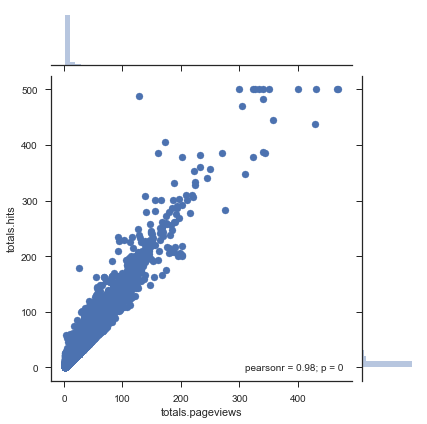

In [550]:
sns.jointplot("totals.pageviews","totals.hits",data=train_df)

In [553]:
train_df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device.browser', 'device.deviceCategory',
       'device.isMobile', 'device.operatingSystem', 'geoNetwork.city',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source'],
      dtype='object')

In [560]:
time = pd.to_datetime(train_df['date'], format = "%Y%m%d")

In [592]:
train_df['time'] = pd.to_datetime(train_df['date'], format = '%Y%m%d')

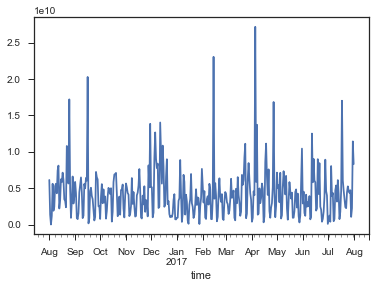

In [595]:
train_df.groupby('time')['totals.transactionRevenue'].agg('sum').plot()

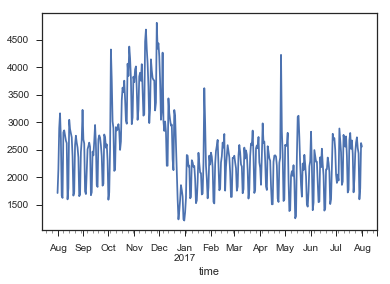

In [596]:
train_df.groupby('time')['totals.transactionRevenue'].agg('count').plot()

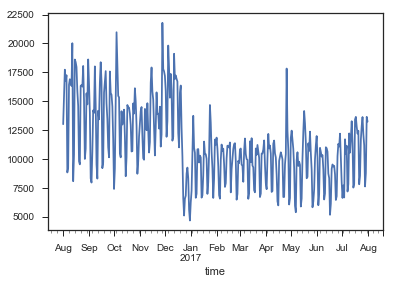

In [597]:
train_df.groupby('time')['totals.hits'].agg('sum').plot()

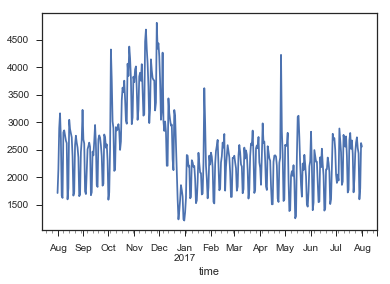

In [598]:
train_df.groupby('time')['totals.hits'].agg('count').plot()

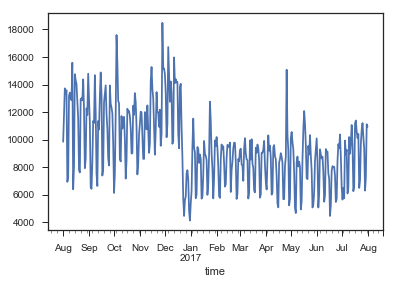

In [599]:
train_df.groupby('time')['totals.pageviews'].agg('sum').plot()

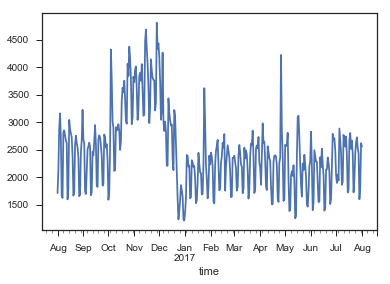

In [600]:
train_df.groupby('time')['totals.pageviews'].agg('count').plot()

In [603]:
train_df = train_df.drop(['time'],axis=1)

In [604]:
train_df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device.browser', 'device.deviceCategory',
       'device.isMobile', 'device.operatingSystem', 'geoNetwork.city',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source'],
      dtype='object')

In [541]:
len(time)

903653

In [543]:
len(train_df['totals.transactionRevenue'])

903653

In [524]:
train_df.columns, test_df.columns

(Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
        'visitStartTime', 'device.browser', 'device.deviceCategory',
        'device.isMobile', 'device.operatingSystem', 'geoNetwork.city',
        'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro',
        'geoNetwork.networkDomain', 'geoNetwork.region',
        'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
        'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
        'trafficSource.adContent',
        'trafficSource.adwordsClickInfo.adNetworkType',
        'trafficSource.adwordsClickInfo.gclId',
        'trafficSource.adwordsClickInfo.isVideoAd',
        'trafficSource.adwordsClickInfo.page',
        'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
        'trafficSource.isTrueDirect', 'trafficSource.keyword',
        'trafficSource.medium', 'trafficSource.referralPath',
        'trafficSource.source'],
       dtype='object'),
 Index(['cha

In [525]:
len(test_df.columns)

33

In [526]:
len(train_df.columns)

34

In [527]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 34 columns):
channelGrouping                                 903653 non-null int64
date                                            903653 non-null int64
fullVisitorId                                   903653 non-null object
visitId                                         903653 non-null int64
visitNumber                                     903653 non-null float64
visitStartTime                                  903653 non-null float64
device.browser                                  903653 non-null int64
device.deviceCategory                           903653 non-null int64
device.isMobile                                 903653 non-null bool
device.operatingSystem                          903653 non-null int64
geoNetwork.city                                 903653 non-null int64
geoNetwork.continent                            903653 non-null int64
geoNetwork.country                           

In [292]:
# Split the train dataset into development and valid based on time 
dev_df = train_df[train_df['date']<=datetime.date(2017,5,31)]
val_df = train_df[train_df['date']>datetime.date(2017,5,31)]


In [293]:
dev_df.shape, val_df.shape

((765707, 34), (137946, 34))

In [294]:
dev_y = np.log1p(dev_df["totals.transactionRevenue"].values)
val_y = np.log1p(val_df["totals.transactionRevenue"].values)



In [295]:
dev_X = dev_df[cat_cols + num_cols] 
val_X = val_df[cat_cols + num_cols] 
test_X = test_df[cat_cols + num_cols] 

In [297]:
dev_X = dev_X.drop('visitStartTime',axis=1)

In [298]:
val_X =val_X.drop('visitStartTime',axis=1)

In [299]:
test_X = test_X.drop('visitStartTime',axis=1)

In [300]:
import lightgbm as lgb

In [301]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

# Training the model #
pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.72094
[200]	valid_0's rmse: 1.71906
Early stopping, best iteration is:
[156]	valid_0's rmse: 1.71835


In [302]:
pred_val


array([ 0.00157086,  0.00129499,  0.00086493, ..., -0.01573348,
        0.04904585, -0.00362414])

In [303]:
from sklearn import metrics


In [304]:
metrics.mean_squared_error(val_y,pred_val)

2.9527433312308338

In [305]:

pred_val[pred_val<0] = 0
val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
val_pred_df["transactionRevenue"] = val_df["totals.transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
#print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

1.7639231764088186


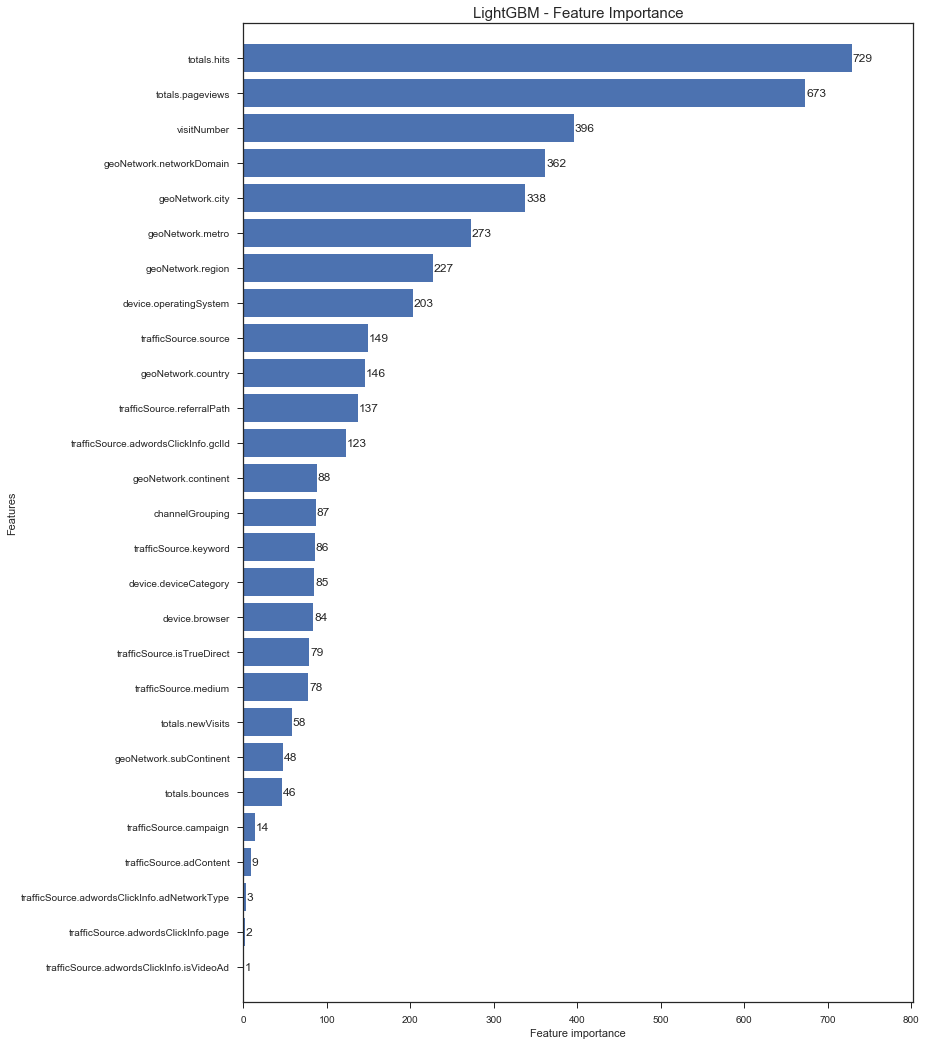

In [306]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [307]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [308]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


In [309]:
from sklearn import metrics   #Additional scklearn functions

In [310]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


In [311]:
from sklearn.model_selection import cross_val_score

In [312]:
from sklearn.model_selection import GridSearchCV

In [313]:
dev_X.shape, val_X.shape, test_X.shape

((765707, 28), (137946, 28), (804684, 28))

In [314]:
dev_y.shape, val_y.shape

((765707,), (137946,))

In [323]:
dev_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765707 entries, 0 to 903652
Data columns (total 28 columns):
channelGrouping                                 765707 non-null int64
device.browser                                  765707 non-null int64
device.deviceCategory                           765707 non-null int64
device.operatingSystem                          765707 non-null int64
geoNetwork.city                                 765707 non-null int64
geoNetwork.continent                            765707 non-null int64
geoNetwork.country                              765707 non-null int64
geoNetwork.metro                                765707 non-null int64
geoNetwork.networkDomain                        765707 non-null int64
geoNetwork.region                               765707 non-null int64
geoNetwork.subContinent                         765707 non-null int64
trafficSource.adContent                         765707 non-null int64
trafficSource.adwordsClickInfo.adNetworkType    7

In [324]:
removing_columns = ['totals.bounces','totals.newVisits']

In [325]:
test_X.shape

(804684, 28)

In [326]:
test_X = test_X.drop(removing_columns, axis=1)

In [327]:
test_X.shape

(804684, 26)

In [328]:
dev_X = dev_X.drop(removing_columns, axis=1)

In [329]:
val_X = val_X.drop(removing_columns, axis =1)

In [330]:
trainingX=dev_X
validationX=val_X
testingX=test_X

In [331]:
(trainingX.head(5))



,channelGrouping,device.browser,device.deviceCategory,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,...,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.isTrueDirect,totals.hits,totals.pageviews,visitNumber
0,4,35,0,20,378,3,210,0,37454,193,...,4,11,5,3196,208,1,1,1.0,1.0,1.0
1,4,43,0,7,955,5,12,122,10098,482,...,4,11,5,3196,208,1,1,1.0,1.0,1.0
2,4,35,0,20,475,4,185,0,38725,99,...,4,11,5,3196,208,1,1,1.0,1.0,1.0
3,4,79,0,6,955,3,94,122,38725,482,...,4,1607,5,3196,208,1,1,1.0,1.0,1.0
4,4,35,1,1,955,4,217,122,38725,482,...,4,11,5,3196,208,1,0,1.0,1.0,2.0


In [332]:
(validationX.head(5))



,channelGrouping,device.browser,device.deviceCategory,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,...,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.isTrueDirect,totals.hits,totals.pageviews,visitNumber
4822,2,35,1,1,955,3,210,122,37454,482,...,4,3327,0,3196,0,1,0,1.0,1.0,1.0
4823,4,35,0,7,639,4,69,0,38725,186,...,4,11,5,3196,208,1,1,1.0,1.0,1.0
4824,2,35,0,3,31,4,144,0,38813,288,...,4,3327,0,3196,0,1,0,1.0,1.0,1.0
4825,4,35,0,20,955,3,43,122,38725,482,...,4,3327,5,3196,112,1,1,1.0,1.0,1.0
4826,4,72,2,23,955,2,218,122,0,482,...,4,11,5,3196,208,1,1,1.0,1.0,1.0


In [333]:
(testingX.head(5))

,channelGrouping,device.browser,device.deviceCategory,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,...,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.isTrueDirect,totals.hits,totals.pageviews,visitNumber
0,4,35,0,7,1,3,176,0,24691,0,...,4,11,5,3196,208,1,0,4.0,4.0,2.0
1,4,35,0,20,948,4,185,0,30734,23,...,4,11,5,3196,208,1,1,5.0,5.0,1.0
2,4,35,0,7,955,4,69,122,32535,482,...,4,11,5,3196,208,1,1,7.0,7.0,1.0
3,4,72,1,23,540,2,218,100,0,73,...,4,11,5,3196,208,1,1,8.0,4.0,1.0
4,4,72,0,7,751,2,218,100,0,73,...,4,11,5,3196,208,1,1,9.0,4.0,1.0


In [334]:
import tensorflow as tf

In [335]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
# rest of the code

In [336]:
from keras.models import Sequential
from keras.layers import Dense

In [337]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [338]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)


In [339]:
from keras import optimizers
import keras

In [340]:
trainingX.shape, validationX.shape

((765707, 26), (137946, 26))

In [352]:
trainingX['totals.pageviews'].isnull().sum()

77

In [365]:
trainingX['totals.pageviews']=trainingX['totals.pageviews'].fillna(0)

In [367]:
validationX['totals.pageviews']=validationX['totals.pageviews'].fillna(0)

In [368]:
validationX['totals.pageviews'].isnull().sum()

0

In [369]:
dev_y.shape, val_y.shape

((765707,), (137946,))

In [370]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [371]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [372]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(32, input_dim=26, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='rmsprop')
	return model

In [374]:
import numpy

In [375]:

seed = 7
numpy.random.seed(seed)
# evaluate model with dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=100, verbose=0)

In [390]:
dev_y.shape, val_y.shape

((765707, 1), (137946, 1))

In [393]:
trainingX.shape, test_X.shape

((765707, 26), (804684, 26))

In [388]:
dev_y = dev_y.reshape(-1,1)

In [389]:
val_y = val_y.reshape(-1,1)

In [394]:

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, trainingX, dev_y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -3.83 (0.40) MSE


In [422]:
estimator.fit(trainingX, dev_y)
prediction_NN = estimator.predict(validationX)


In [423]:
estimator

In [415]:

prediction_NN[prediction_NN<0] = 0
val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
val_pred_df["transactionRevenue"] = val_df["totals.transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(prediction_NN)
#print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

2.2433162501127293


In [398]:
results.mean()

-3.833590602650536

In [425]:
from sklearn.preprocessing import MinMaxScaler

In [427]:
model2 = Sequential()
model2.add(Dense(64, input_dim=26, kernel_initializer='normal', activation='relu'))
model2.add(Dense(32, kernel_initializer='normal'))
model2.add(Dense(1))
# Compile model
model2.compile(loss='mean_squared_error', optimizer='rmsprop')


In [435]:
from sklearn.preprocessing import StandardScaler

In [439]:
scale = StandardScaler()

In [441]:
scaled_x = scale.fit_transform(trainingX)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [442]:
scaled_validation_x = scale.transform(validationX)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [443]:
model2.fit(scaled_x, dev_y, epochs=10, verbose=0)

In [444]:
predictions_NN_NN = model2.predict(scaled_validation_x)

In [445]:
metrics.mean_squared_error(val_y,predictions_NN_NN)

3.210208760535038

In [446]:

predictions_NN_NN[predictions_NN_NN<0] = 0
val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
val_pred_df["transactionRevenue"] = val_df["totals.transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(predictions_NN_NN)
#print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

1.820925774683398


In [163]:
from pandas.util.testing import assert_frame_equal

In [221]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [400]:
import xgboost
import math

In [401]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [402]:
xgb.fit(trainingX, dev_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [403]:
predictions = xgb.predict(validationX)
metrics.mean_squared_error(val_y,predictions)

2.9530515121519914

In [404]:
#xgboost mean sqe =2.95 

In [412]:

predictions[predictions<0] = 0
val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
val_pred_df["transactionRevenue"] = val_df["totals.transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(predictions)
#print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

1.7679541415852673
